## Analysis of Trajectories

**Remark**
to run this script, you need to: 
- configure the data_folder (reafears to README.md  and .env file to understand how to configure it). 
- unzip the data.zip content into the data_folder.

### Import and function definitions

In [85]:
import pickle 
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### List of Interactions: uc2.pickle file

In [86]:
with open('uc2.pickle','rb') as pickle_file:
    interactions = pickle.load(pickle_file)

In [78]:
print("target trajectory:", list(interactions.keys()))

target trajectory: [5, 6, 13, 14, 21, 27, 28, 31, 32, 41, 43, 45, 49, 53, 60, 88, 94, 96, 97, 103, 142, 143, 144, 149, 150, 152, 168, 176, 179, 193, 195, 198, 209, 216, 222, 239, 240, 247, 257, 258, 260, 262, 269, 290, 292, 303, 306, 316, 317, 319, 322, 341, 342, 343, 344, 345, 347, 351, 352, 364, 365, 388, 391, 393, 403, 409, 415, 418, 422, 425, 433, 441, 445, 447, 461, 462, 479, 480, 486, 511, 515, 518, 520, 529, 531, 532, 547, 550, 553, 556, 562, 577, 578, 581, 604, 607, 609, 611, 615, 663, 665, 667, 669, 671, 672, 674, 675, 677, 678, 681, 683, 688, 689, 701, 715, 716, 718, 721, 723, 732, 734, 747, 775, 776, 801, 802, 809, 810, 817, 828, 829, 830, 833, 845, 847, 854, 855, 858, 866, 870, 872, 874, 876, 889, 891, 893, 896, 902, 907, 923, 924, 925, 935, 938, 940, 946, 948, 971, 981, 983, 987, 990, 1024, 1034, 1054, 1056, 1058, 1060, 1063, 1084, 1086, 1093, 1101, 1109, 1128, 1129, 1136, 1137, 1163, 1184, 1206, 1209, 1227, 3562, 3577, 3761, 3765, 3767, 3800, 3809, 3822, 3825, 3828, 3830,

### Analysis of what is perceived from SimulationLink

In [87]:
with open("dataset_trajectory.pickle","rb") as file:
    dataset_trajectory = pickle.load(file)

with open("irl_trajectory.pickle","rb") as file:
    irl_trajectory = pickle.load(file)

### Trajectories Info

In [88]:
print("dataset_trajectory info:", list(dataset_trajectory.keys()))
print("irl_trajectory info:", list(irl_trajectory.keys()))

dataset_trajectory info: ['time', 1, 2, 3, 0]
irl_trajectory info: ['time', 1, 2, 3, 0]


- id = 0 -> target trajectory
- id > 0 -> obstacles

#### Observe what is happening

In [89]:
encoding = {"X":0, "Y":1, "VX":2, "VY" :3, "AX":4, "AY":5}

def import_trajectory(storage, agent_id):
    time = storage['time']
    agent = np.array(storage[agent_id])
    return time, agent

def plot_comparison(agent_id):
    time_irl, M_irl = import_trajectory(irl_trajectory,agent_id)
    time_data, M_data = import_trajectory(dataset_trajectory,agent_id)
    fig, axes = plt.subplots(3, 2, figsize=(20,10))
    axes[0,0].plot(time_irl, M_irl[:,encoding['X']], label='irl_trajectory')
    axes[0,0].plot(time_data, M_data[:,encoding['X']], label ='dataset_trajectory')
    axes[0,1].plot(time_irl, M_irl[:,encoding['Y']])
    axes[0,1].plot(time_data, M_data[:,encoding['Y']])
    axes[1,0].plot(time_irl, M_irl[:,encoding['VX']])
    axes[1,0].plot(time_data, M_data[:,encoding['VX']])
    axes[1,1].plot(time_irl, M_irl[:,encoding['VY']])
    axes[1,1].plot(time_data, M_data[:,encoding['VY']])
    axes[2,0].plot(time_irl, M_irl[:,encoding['AX']])
    axes[2,0].plot(time_data, M_data[:,encoding['AX']])
    axes[2,1].plot(time_irl, M_irl[:,encoding['AY']])
    axes[2,1].plot(time_data, M_data[:,encoding['AY']])
    axes[0,0].legend()

def plot(data,agent_id):
    time, M = import_trajectory(data,agent_id)
    fig, axes = plt.subplots(3,2, figsize=(20,10))
    axes[0,0].plot(time, M[:,encoding['X']])
    axes[0,1].plot(time, M[:,encoding['Y']])
    axes[1,0].plot(time, M[:,encoding['VX']])
    axes[1,1].plot(time, M[:,encoding['VY']])
    axes[2,0].plot(time, M[:,encoding['AX']])
    axes[2,1].plot(time, M[:,encoding['AY']])
 

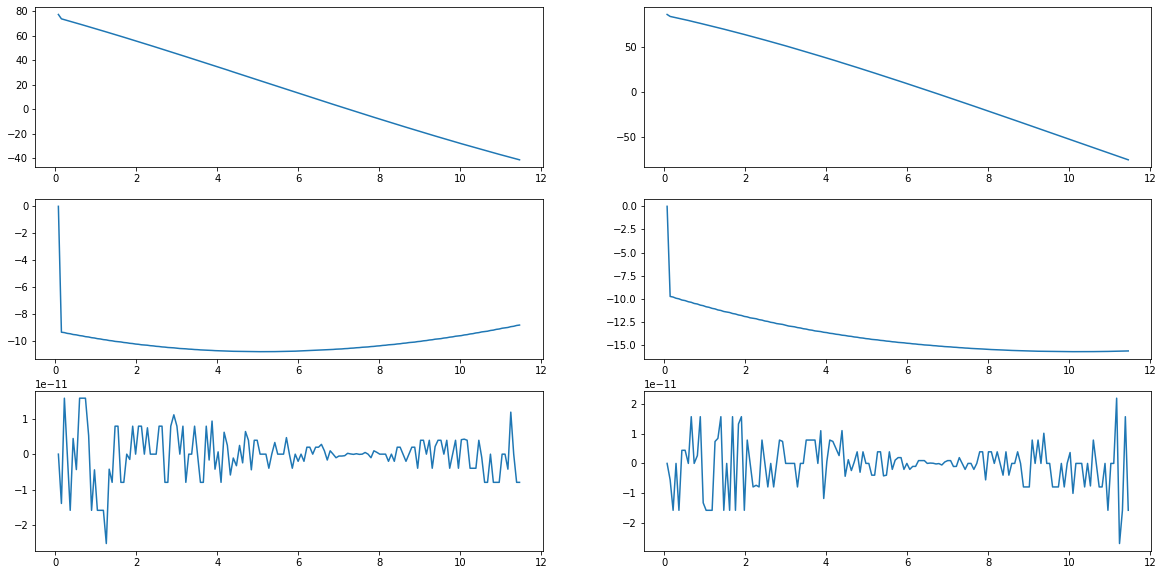

In [90]:
plot(dataset_trajectory, 0)

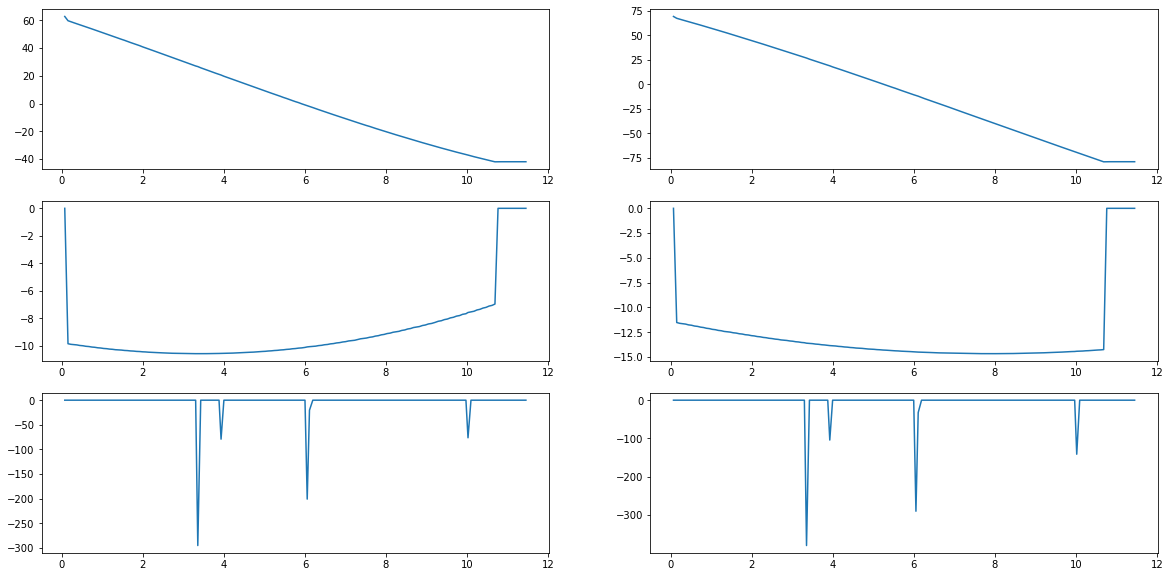

In [93]:
plot(irl_trajectory, 1)

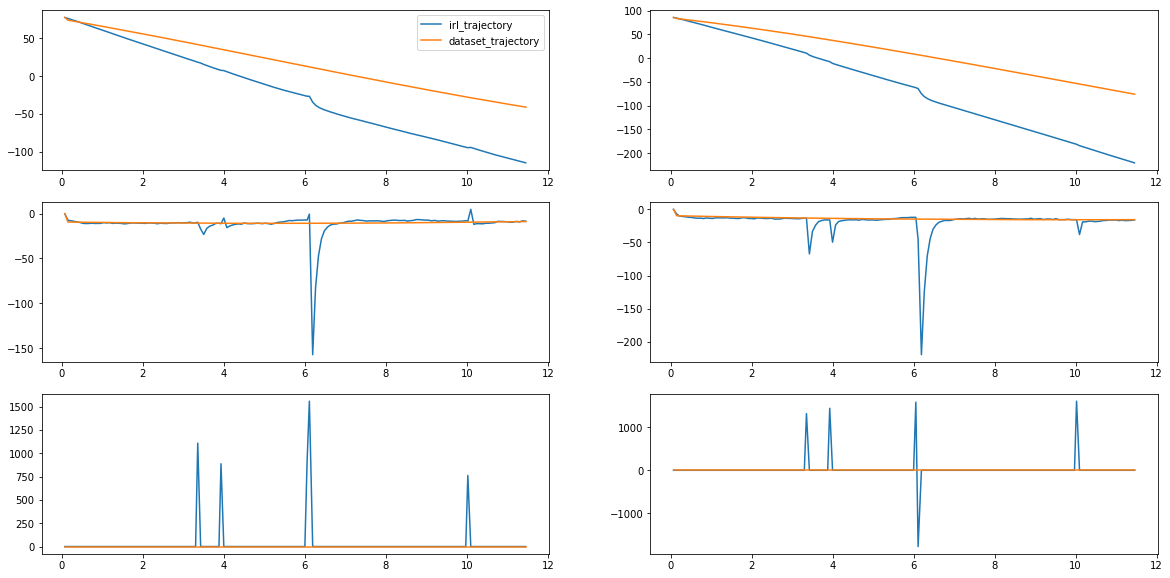

In [92]:
plot_comparison(0)

### [Q] There are many (randomic) spikes. Why?
- [A] I think the reason is due to the deadreckoning dynamics (change the code: gemini.action_logic.FollowTrajectoryLogic.act)

### Analysis of what is perceived from IRL model

In [68]:
def import_trajectory_data(data):
    time = data[0]
    state = np.array(data[1])
    torch_state = np.array(data[2])
    action = data[3]
    ids = np.array(list(data[4]))
    # X2 is che target_vehicle
    df = pd.DataFrame(torch_state, 
             columns=['X1', 'Y1','VX1', 'VY1','AX1', 'AY1','X2', 'Y2','VX2', 'VY2','AX2', 'AY2','X0', 'Y0','VX0', 'VY0','AX0', 'AY0'])
    # time definition 
    df['T'] = time
    # distance of obstacle 0 from target
    df['D1'] = np.sqrt((df['X0'] - df['X1']) * (df['X0'] - df['X1']) + (df['Y0'] - df['Y1']) * (df['Y0'] - df['Y1'])) 
    # distance of obstacle 1 from target
    df['D2'] = np.sqrt((df['X0'] - df['X2']) * (df['X0'] - df['X2']) + (df['Y0'] - df['Y2']) * (df['Y0'] - df['Y2']))
    df['ACTION'] = action
    df['TORCH_STATE'] = list(torch_state)
    df['ID0'] = 0
    df['ID1'] = ids[:,0]
    df['ID2'] = ids[:,1]
    return df

def plot(df,agent_id):
    fig, axes = plt.subplots(4, 2, figsize=(20,10))
    df.plot('T', f'ID{agent_id}', ax=axes[0,0])
    df.plot('T', f'ID{agent_id}', ax=axes[0,1])
    df.plot('T', f'X{agent_id}', ax=axes[1,0])
    df.plot('T', f'Y{agent_id}', ax=axes[1,1])
    df.plot('T', f'VX{agent_id}', ax=axes[2,0])
    df.plot('T', f'VY{agent_id}', ax=axes[2,1])
    df.plot('T', f'AX{agent_id}', ax=axes[3,0])
    df.plot('T', f'AY{agent_id}', ax=axes[3,1])
    plt.title(f" Agent{agent_id}")
    
def plot_comparison(df1,df2,agent_id):
    fig, axes = plt.subplots(3, 2, figsize=(20,10))
    df1.plot('T', f'X{agent_id}', ax=axes[0,0], label=f'(1) X{agent_id}')
    df1.plot('T', f'Y{agent_id}', ax=axes[0,1], label=f'(1) Y{agent_id}')
    df1.plot('T', f'VX{agent_id}', ax=axes[1,0], label=f'(1) VX{agent_id}')
    df1.plot('T', f'VY{agent_id}', ax=axes[1,1], label=f'(1) VY{agent_id}')
    df2.plot('T', f'AX{agent_id}', ax=axes[2,0], label=f'(1) AX{agent_id}')
    df2.plot('T', f'AY{agent_id}', ax=axes[2,1], label=f'(1) AY{agent_id}')
    df2.plot('T', f'X{agent_id}', ax=axes[0,0], label=f'(2) X{agent_id}')
    df2.plot('T', f'Y{agent_id}', ax=axes[0,1], label=f'(2) Y{agent_id}')
    df2.plot('T', f'VX{agent_id}', ax=axes[1,0], label=f'(2) VX{agent_id}')
    df2.plot('T', f'VY{agent_id}', ax=axes[1,1], label=f'(2) VY{agent_id}')
    df2.plot('T', f'AX{agent_id}', ax=axes[2,0], label=f'(2) AX{agent_id}')
    df2.plot('T', f'AY{agent_id}', ax=axes[2,1], label=f'(2) AY{agent_id}')

In [94]:
with open("irl_perception_data.pickle","rb") as file:
    irl_perception_data = import_trajectory_data(pickle.load(file))

In [95]:
irl_perception_data.head()

,X1,Y1,VX1,VY1,AX1,AY1,X2,Y2,VX2,VY2,...,AX0,AY0,T,D1,D2,ACTION,TORCH_STATE,ID0,ID1,ID2
0,78.041077,86.479256,0.0,0.0,0.0,0.0,72.109283,98.762833,0.0,0.0,...,0.000000e+00,0.000000e+00,0.073,0.997160,14.120016,"[-0.36414140462875366, -0.35784628987312317]","[78.04108, 86.479256, 0.0, 0.0, 0.0, 0.0, 72.1...",0,2,3
1,78.041077,86.479256,0.0,0.0,0.0,0.0,72.109283,98.762833,0.0,0.0,...,-7.172713e-13,1.044282e-12,0.153,2.887586,14.944328,"[-0.39701563119888306, -0.5150552988052368]","[78.04108, 86.479256, 0.0, 0.0, 0.0, 0.0, 72.1...",0,2,3
2,78.041077,86.479256,0.0,0.0,0.0,0.0,72.109283,98.762833,0.0,0.0,...,7.889985e-13,-7.904788e-13,0.225,4.861260,16.210817,"[-0.43042847514152527, -0.5346447229385376]","[78.04108, 86.479256, 0.0, 0.0, 0.0, 0.0, 72.1...",0,2,3
3,78.041077,86.479256,0.0,0.0,0.0,0.0,72.109283,98.762833,0.0,0.0,...,-7.904788e-13,0.000000e+00,0.297,6.867682,17.601141,"[-0.45862293243408203, -0.562892735004425]","[78.04108, 86.479256, 0.0, 0.0, 0.0, 0.0, 72.1...",0,2,3
4,78.041077,86.479256,0.0,0.0,0.0,0.0,72.109283,98.762833,0.0,0.0,...,5.867361e-13,-1.044282e-12,0.373,8.949901,19.151829,"[-0.48930567502975464, -0.6035952568054199]","[78.04108, 86.479256, 0.0, 0.0, 0.0, 0.0, 72.1...",0,2,3


### Data Frame Columns Description

- 'X0', 'Y0', 'VX0', 'VY0', 'AX0', 'AY0' -> State of model IRL
- 'X1', 'Y1', 'VX1', 'VY1', 'AX1','AY1', -> State of 1 nearest obstacles 
- 'X2', 'Y2', 'VX2', 'VY2', 'AX2', 'AY2' -> State of 2 nearest obstacles 
- 'T' -> Time
- 'D1', 'D2'-> -> Distance of model IRL from first and second nearest obstacles
- 'ACTION' --> model agent
- 'TORCH_STATE' --> torch state of model agent
- 'ID0', 'ID1', 'ID2' -> id of model IRL, 

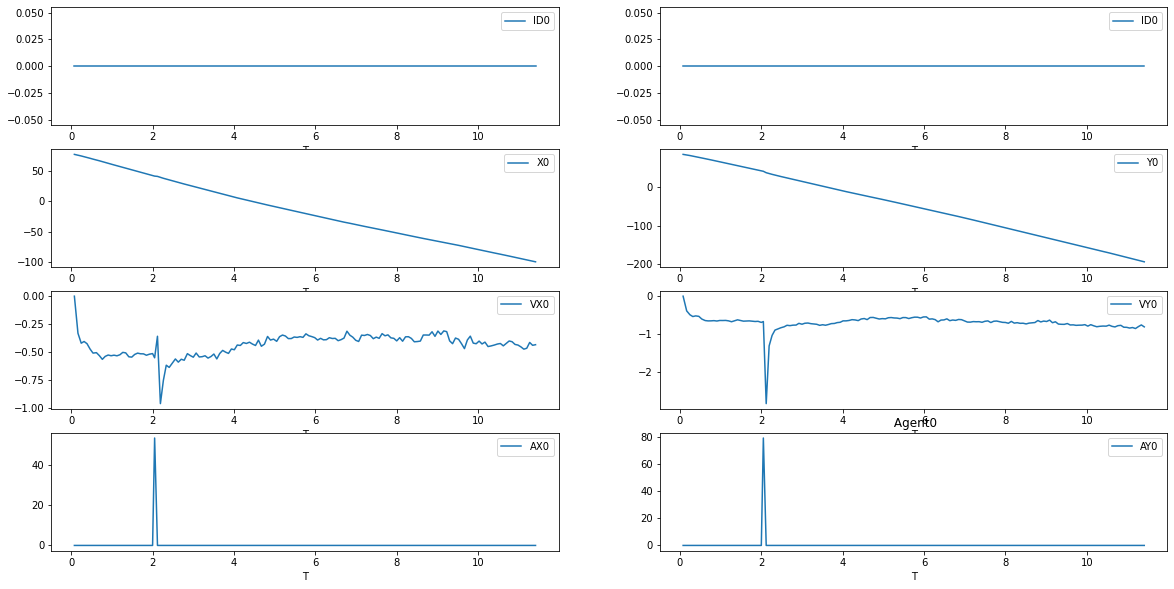

In [73]:
plot(irl_perception_data, '0')

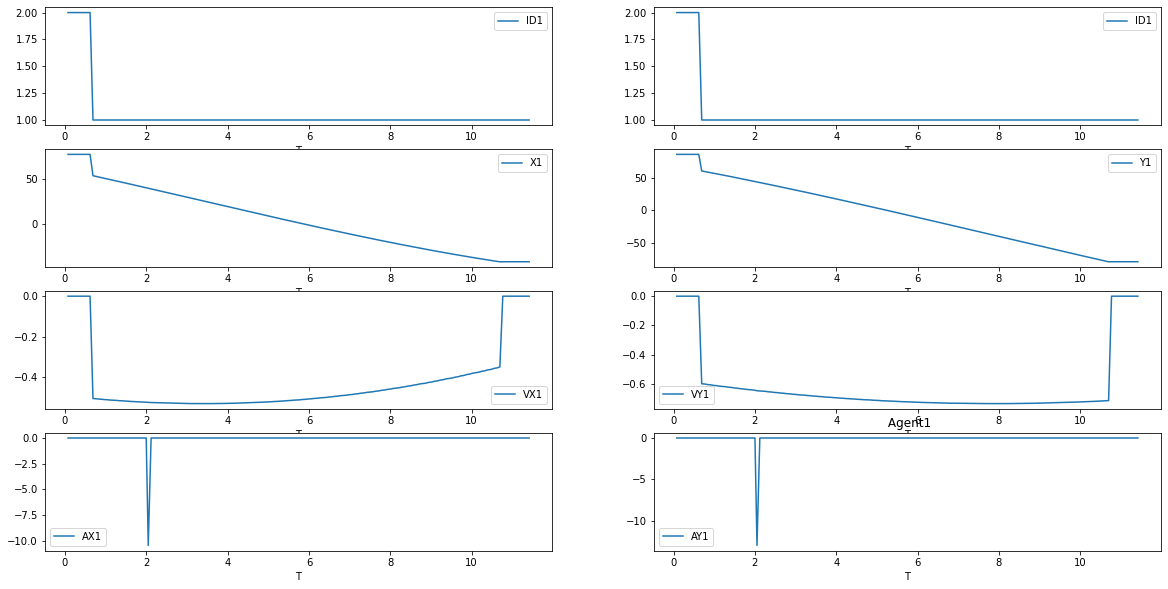

In [74]:
plot(irl_perception_data, '1')

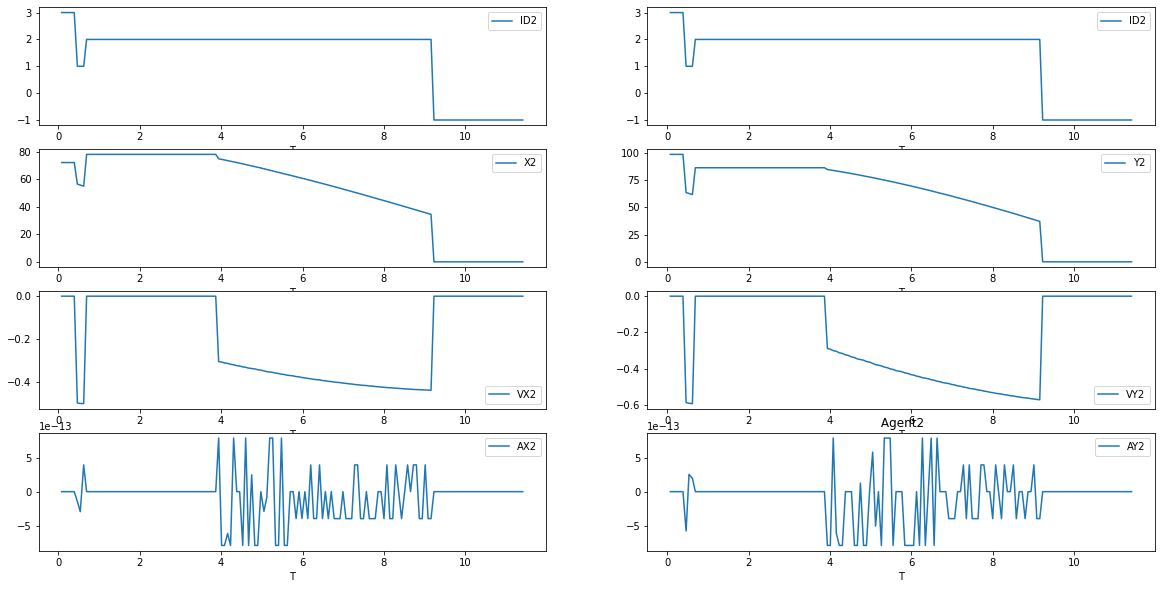

In [75]:
plot(irl_perception_data, '2')